# Project 4 Comcast Telecom Consumer Complaints 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import data into Python environment.

In [2]:
df_complaints = pd.read_csv("C:\\rohit\\simple\\Data Science with Python\\practice project4\\Comcast_telecom_complaints_data.csv")

In [3]:
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df_complaints["date_index"] = df_complaints["Date_month_year"] + " " + df_complaints["Time"]
df_complaints["date_index"] = pd.to_datetime(df_complaints["date_index"])
df_complaints["Date_month_year"] = pd.to_datetime(df_complaints["Date_month_year"])
df_complaints = df_complaints.set_index(df_complaints["date_index"])

#### Trend chart for the number of complaints at monthly granularity levels

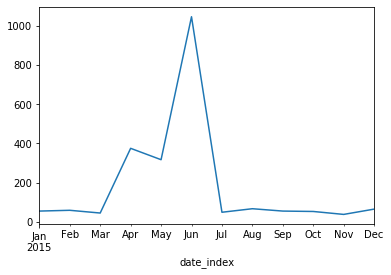

In [5]:
df_complaints.groupby(pd.Grouper(freq="M")).size().plot()

#### Trend chart for the number of complaints at daily granularity levels

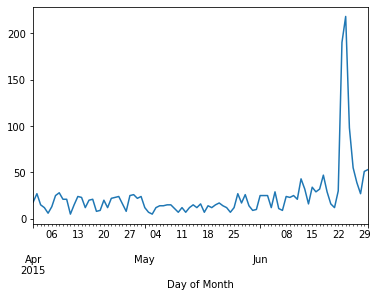

In [9]:
df_complaints['Day of Month'] = pd.to_datetime(df_complaints["Date"])
df_complaints = df_complaints.set_index(df_complaints["Day of Month"])
df_complaints.groupby(pd.Grouper(freq="D")).size().plot()

#### Provide a table with the frequency of complaint types

In [18]:
df_type = df_complaints["Customer Complaint"].value_counts()

In [19]:
df_type.head(25)

Comcast                      83
Comcast Internet             18
Comcast Data Cap             17
comcast                      13
Comcast Billing              11
Data Caps                    11
Comcast Data Caps            11
Unfair Billing Practices      9
Data Cap                      8
Internet speed                8
Comcast/Xfinity               8
Comcast data cap              8
Comcast data caps             8
Comcast internet              8
Comcast Service               6
COMCAST                       6
Billing                       6
Comcast service               6
Comcast billing               6
Internet Speed                5
Comcast Internet Service      5
Comcast complaint             5
Comcast Complaint             5
Slow Internet                 4
Comcast Billing Complaint     4
Name: Customer Complaint, dtype: int64

###### Python is case-sensitive it is treating Comcast and comcast as two different complaints.If all complaints are changed to upper case then it will give a correct count.

In [25]:
df_type = df_complaints['Customer Complaint'].str.upper().value_counts()

In [21]:
df_type.head(25)

COMCAST                      102
COMCAST DATA CAP              30
COMCAST INTERNET              29
COMCAST DATA CAPS             21
COMCAST BILLING               18
INTERNET SPEED                15
COMCAST SERVICE               15
UNFAIR BILLING PRACTICES      13
DATA CAPS                     13
DATA CAP                      12
COMCAST/XFINITY               11
COMCAST COMPLAINT             11
COMCAST INTERNET SERVICE      10
BILLING                        9
BILLING ISSUES                 8
COMCAST BILLING COMPLAINT      5
COMCAST ISSUES                 5
COMCAST BILLING PRACTICES      5
INTERNET SERVICE               5
COMPLAINT AGAINST COMCAST      5
COMCAST CABLE                  5
SERVICE ISSUES                 5
INTERNET                       5
SLOW INTERNET                  5
COMCAST BILLING ISSUES         4
Name: Customer Complaint, dtype: int64

###### Complaint types are maximum  around Comcast , Comcast data Cap , Comcast Internet , Comcast data Cap , Comcast Billing

#### Create a new categorical variable with value as Open and Closed. 
Open & Pending is to be categorized as Open 
and Closed & Solved is to be categorized as Closed.

In [26]:
df_complaints["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df_complaints["Status"]]

In [56]:
df_status = df_complaints.groupby('State').newStatus.value_counts().unstack()
#df_status = df_complaints.groupby(['State','newStatus'])['COUNT'].sum().unstack()

In [57]:
df_status.head(25)

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<Figure size 20000x10000 with 0 Axes>

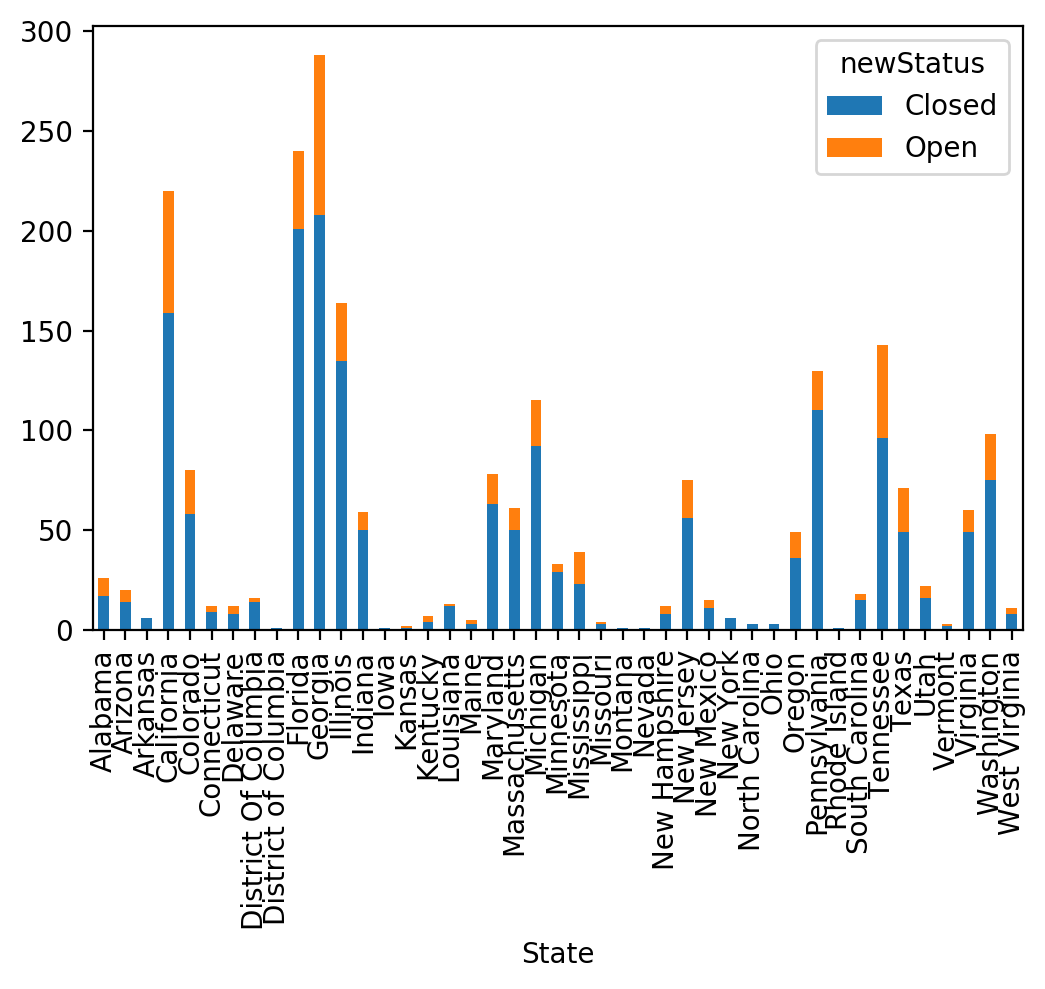

In [72]:
plt.figure(figsize=(200,100)) 
plt.rcParams['figure.dpi'] = 200
df_status.plot(kind='bar', stacked=True)


#### Georgia has maximum number of complaints

In [84]:
# Unresolved complaints distribution across State
df_unresolved = df_complaints[df_complaints['newStatus']=='Open']
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_unresolved = df_unresolved['State'].value_counts()
df_unresolved.head(25)


Georgia          80
California       61
Tennessee        47
Florida          39
Illinois         29
Michigan         23
Washington       23
Texas            22
Colorado         22
Pennsylvania     20
New Jersey       19
Mississippi      16
Maryland         15
Oregon           13
Virginia         11
Massachusetts    11
Alabama           9
Indiana           9
Utah              6
Arizona           6
Minnesota         4
New Mexico        4
Delaware          4
New Hampshire     4
Connecticut       3
Name: State, dtype: int64

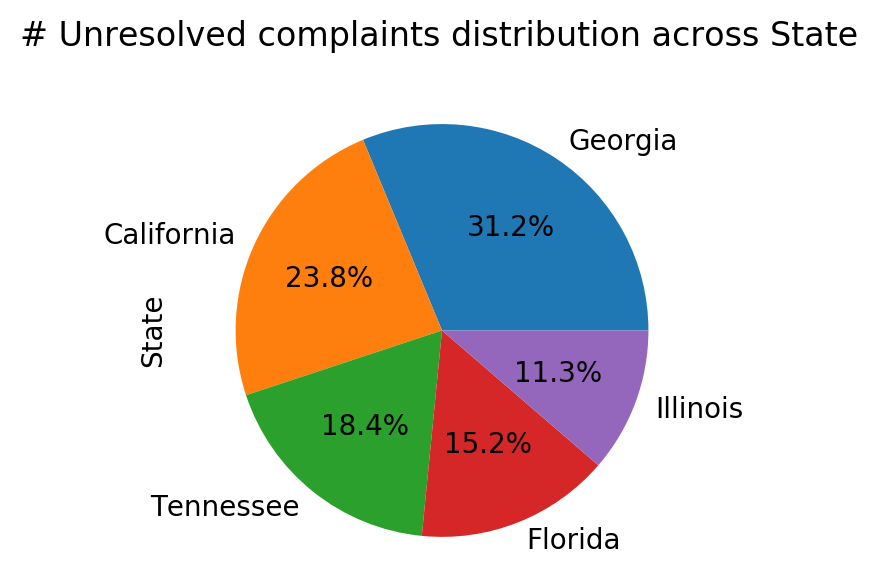

In [85]:
df_unresolved.head().plot(kind='pie',autopct='%1.1f%%',
                        #explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (4,3))
plt.axis('equal')
plt.title('# Unresolved complaints distribution across State\n')
plt.tight_layout()
plt.show()

#### Georgia has maximum percentage of unresolved complaints

#### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [86]:
df_received = df_complaints[df_complaints['Received Via'].isin(['Internet','Customer Care Call'])]

In [87]:
df_received.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day of Month,newStatus
Day of Month,,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22,Closed
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08,Closed
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18,Closed
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26,Closed


In [88]:
df_received.newStatus.value_counts()

Closed    1707
Open       517
Name: newStatus, dtype: int64

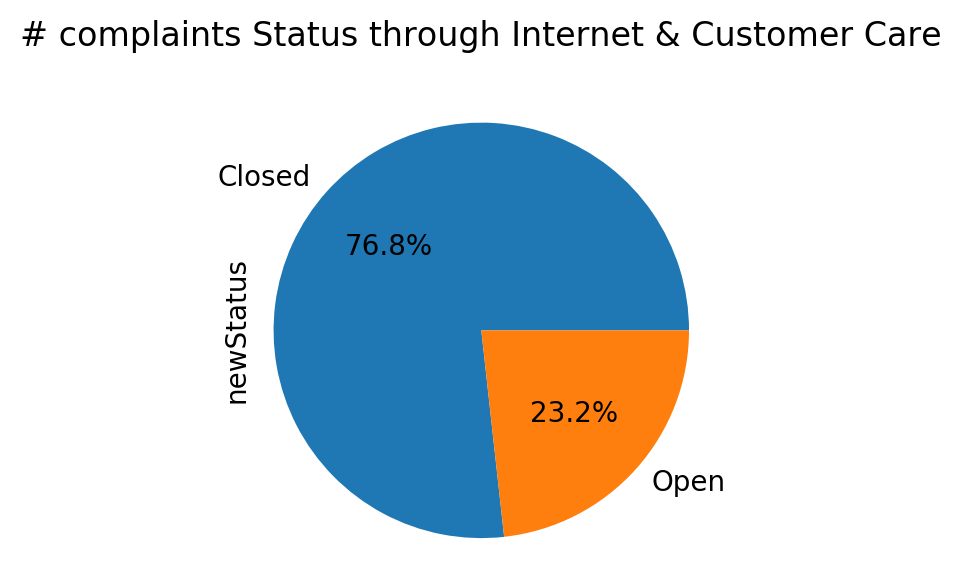

In [102]:
df_received.newStatus.value_counts().plot(kind='pie',autopct='%1.1f%%',
                        #explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (4,3))
plt.axis('equal')
plt.title('# complaints Status through Internet & Customer Care\n')
plt.tight_layout()
plt.show()

In [92]:
df_received_closed = df_received[df_received['newStatus']=='Closed']

In [93]:
df_received_closed.newStatus.value_counts()

Closed    1707
Name: newStatus, dtype: int64